# underfit -- pic

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression


## non-separable dataset

In [5]:
def label(X,angle=30,shift=[-5,-3],a=0.3):
    X=X+np.array([shift])
    angle=math.radians(angle)
    return a*(X[:,0]*math.cos(angle)-X[:,1]*math.sin(angle))**2<(X[:,0]*math.sin(angle)+X[:,1]*math.cos(angle))
X=np.random.random(size=(100,2))*10
y=label(X)


resolution=500
L1=np.linspace(-0.5,10.5,num=resolution)
L2=np.linspace(-0.5,10.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

In [11]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X,y)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
logreg2=Pipeline([("quad_feat",PolynomialFeatures(degree=2)),("logreg",LogisticRegression(solver='lbfgs'))])

logreg2.fit(X,y)

Pipeline(steps=[('quad_feat', PolynomialFeatures()),
                ('logreg', LogisticRegression())])

## both in one pic

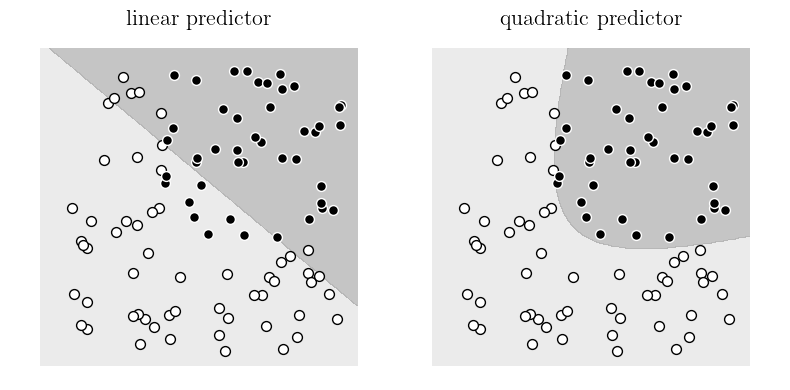

In [14]:
plt.style.use("lecture.mplstyle")

_,axs=plt.subplots(1,2,figsize=(8,4))
for ax,dt,title in zip(axs,[logreg,logreg2],["linear predictor","quadratic predictor"]):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    whites=X[y==0]
    blacks=X[y==1]
    ax.scatter(whites[:,0],whites[:,1],c="white",edgecolor="black",s=50)
    ax.scatter(blacks[:,0],blacks[:,1],c="black",edgecolor="white",s=50)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("equal")
    ax.set_title(title,fontsize=16)
plt.tight_layout()
plt.savefig("underfit.png",dpi=300)
